# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer

For each of these a `.names` file is provided with details on the origin of data.

In [1]:
# Pretty Much Standard Imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Getting the breast cancer data set from Sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# Remember, sklearn datasets are stored in a dictionary format
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()
y = data.target
y_as_df = pd.DataFrame(data.target, columns=['benign'])

# Exercise 1: Breast Cancer



## 1.a: Load the Data
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [3]:
# Lets check and see if we have any null values in out data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

0 null values.  Looks like this data was cleaned prior.

## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

In [9]:
# Lets see what our bench mark score would be if we only predicted 1
#baseline => 63%
y_as_df['benign'].value_counts() / len(y)

1    0.627417
0    0.372583
Name: benign, dtype: float64

In [12]:
# I did not like typing 'y_as_df' so I changed it.
y1 = y_as_df['benign']

In [29]:
# Lets get a support vector classifier and some CV to go with it
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

# Creating a list a model/cv function will populate
all_scores = []
# Setting our SVC with Kernel Type
# Kernel types = linear, poly, rbf, sigmoid, precomputed
model = SVC(kernel='linear')

# to make things easier we're going to make a function
def do_cv(model, X, y, cv):
    # Takes a set model, an X and a y , and a number of CVs
    scores = cross_val_score(model, X, y, cv=cv)
    print model
    sm = scores.mean()
    ss = scores.std()
    res = (sm, ss)
    print "Average score: {:0.3}+/-{:0.3}".format(*res)
    # 0.3 is rounding the results to the 3rd decimol
    # .format is like using string modulos, but allows us to 'format' the output

    return res

all_scores.append(do_cv(model, X, y, 3))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average score: 0.951+/-0.0132
(0.95078436832822799, 0.013154062501467554)


In [13]:
# Lets run the RBF kernel through the function
model = SVC(kernel='rbf')
all_scores.append(do_cv(model, X, y, 3))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average score: 0.627+/-0.00156


In [14]:
# Building a pipeline to add a scaling element to the function
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scaled Linear Kernel
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
all_scores.append(do_cv(model, X, y, 3))

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Average score: 0.972+/-0.00655


In [15]:
# Scaled RBF 
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
all_scores.append(do_cv(model, X, y, 3))


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
Average score: 0.975+/-0.00658


(0.6, 1)

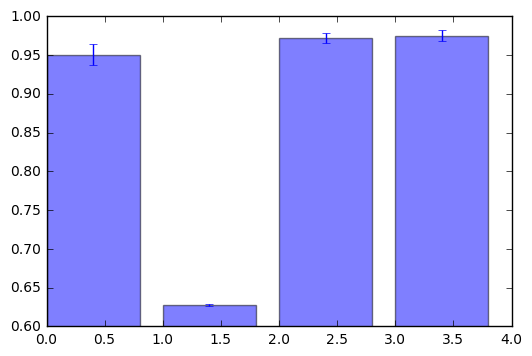

In [17]:
# Visualize the results of the models
plt.bar(xrange(4),
        [m[0] for m in all_scores],
        yerr=[m[1] for m in all_scores],
        alpha = 0.5)
plt.ylim(0.6,1)

# That unscaled RBF Tanked

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))


**Check:** Are there more false positives or false negatives? Is this good or bad?
>Answer: More false negatives is bad from the point of view of the patient and good from the point of view of the insurance company. Viceversa otherwise.


##  1.c: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [24]:
from sklearn import grid_search
from sklearn.cross_validation import StratifiedKFold



parameters = {'svc__kernel':('linear', 'rbf'), 'svc__C':[0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), SVC())

def do_grid_search(input_model, X, y, parameters):
    model = grid_search.GridSearchCV(input_model, parameters, cv=StratifiedKFold(y, 5), n_jobs=-1)
    model.fit(X, y)
    print "Best Params:", model.best_params_
    print "Best Score:", model.best_score_
    return model.best_estimator_

In [25]:
best_model = do_grid_search(model, X, y, parameters)


Best Params: {'svc__kernel': 'rbf', 'svc__C': 10}
Best Score: 0.977152899824


In [26]:
best_model


Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [27]:
model

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

# Exercise 2
Now let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

> Answer: see above



## OPTIONAL
## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes


In [ ]:
# Lets build a confussion matrix
from sklearn.metrics import confusion_matrix, classification_report

def print_cm_cr(y_true, y_pred, names):
    # CM takes our true and predicted values and matrix labels
    """prints the confusion matrix and the classification report"""
    # Set the Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    # Column names of 'pred_benign', 'pred_cancer'
    cols = ['pred_' + c for c in names]
    # COnvert the Confusion Matrix with col and index labels to a df
    dfcm = pd.DataFrame(cm, columns = cols, index = names)
    # Printing the DF gets rid of the 'neat' lines
    print dfcm
    print # Printing nothing will create a space
    print classification_report(y_true, y_pred)
    

In [28]:
# Creating another function to do the CR and prints the CM_CR
def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_cm_cr(y_test, y_pred, names)

do_cm_cr(model, X, y, ['benign', 'cancer'])

        pred_benign  pred_cancer
benign           68            2
cancer            2          116

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        70
          1       0.98      0.98      0.98       118

avg / total       0.98      0.98      0.98       188

